In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
import soundfile as sf

from IPython.display import Audio

%matplotlib inline

# Hacking Synthesizers!


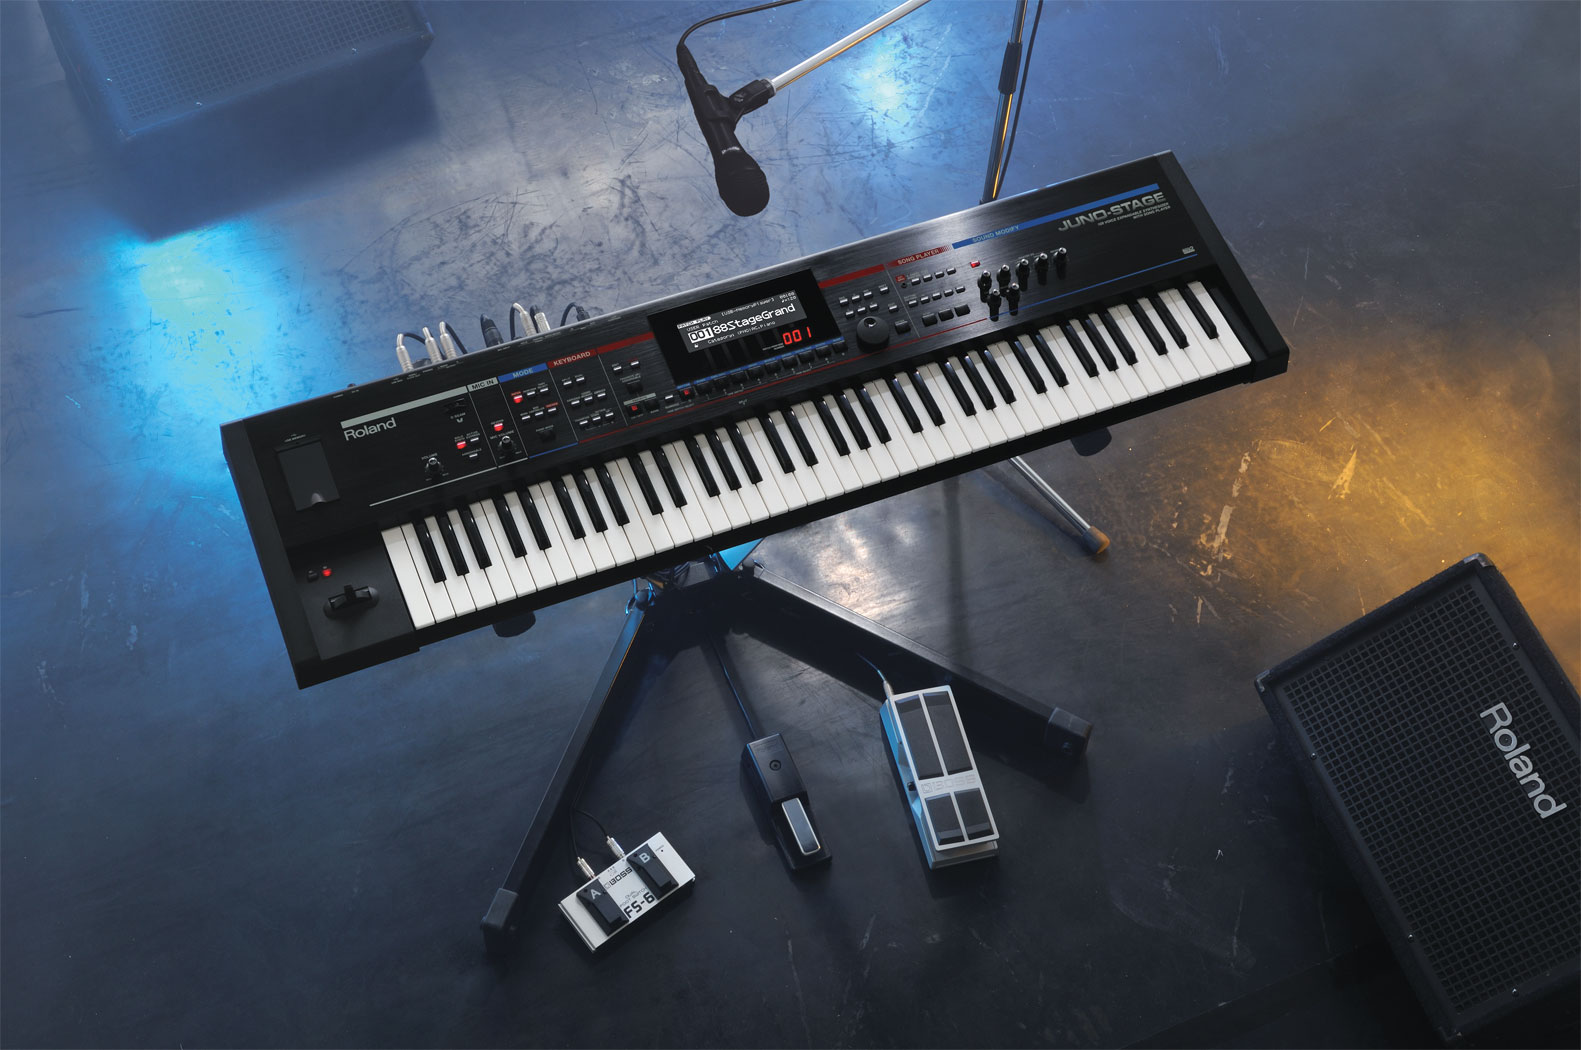

## But first ... what even is sound?

https://musiclab.chromeexperiments.com/Sound-Waves/

In [ ]:
samplerate = 44100
frequency = 440
twopi = 2 * np.pi

time = np.linspace(0, 1, samplerate, endpoint=False)

## Simple Oscillators

https://musiclab.chromeexperiments.com/Oscillators/

In [ ]:
sinewave = np.sin(twopi * frequency * time)

plt.figure(figsize=(12, 4))
plt.plot(time, sinewave)
plt.xlim(0, 0.05)
plt.xlabel("Time (sec)")

Audio(sinewave, rate=samplerate)

In [ ]:
squarewave = scipy.signal.square(twopi * frequency * time)

plt.figure(figsize=(12, 4))
plt.plot(time, squarewave)
plt.xlim(0, 0.05)
plt.xlabel("Time (sec)")

Audio(squarewave, rate=samplerate)

In [ ]:
sawwave = scipy.signal.sawtooth(twopi * frequency * time)

plt.figure(figsize=(12, 4))
plt.plot(time, sawwave)
plt.xlim(0, 0.05)
plt.xlabel("Time (sec)")

Audio(sawwave, rate=samplerate)

## Harmonics & Additive Synthesis

https://musiclab.chromeexperiments.com/Harmonics/

In [ ]:
complex_wave = np.sin(twopi * frequency * time)
complex_wave += (1 / 2) * np.sin(twopi * 2 * frequency * time)
complex_wave += (1 / 4) * np.sin(twopi * 4 * frequency * time)
complex_wave += (1 / 8) * np.sin(twopi * 8 * frequency * time)

plt.figure(figsize=(12, 4))
plt.plot(time, complex_wave)
plt.xlim(0, 0.05)
plt.xlabel("Time (sec)")

Audio(complex_wave, rate=samplerate)

## FM Synthesis

In [ ]:
beta = 1
frequency_mod = 440
fm_wave = np.sin((twopi * frequency * time) + beta * np.sin(twopi * frequency_mod * time))

plt.figure(figsize=(12, 4))
plt.plot(time, fm_wave)
plt.xlim(0, 0.05)
plt.xlabel("Time (sec)")

Audio(fm_wave, rate=samplerate)

## Envelopes

When we play music, "real" sounds change loundess over time. This is referred to as an envelope. 

In synthesizers, this is often specified by four stages: Attack, Decay, Sustain, and Release (ADSR).

* Attack: The time it takes for the sound to reach peak amplitude

* Decay: Time after the initial rise

* Sustain: The part of the sound when holding a tone.

* Release: The time it takes for all sound to stop.

In [ ]:
attack = 0.05
decay = 0.05
release = 0.1
sustain = 1 - (attack + decay + release)

peak_level = 1.0
sustain_level = 0.5

envelope = np.concatenate([np.linspace(0, peak_level, int(attack * samplerate), endpoint=False),
                           np.linspace(peak_level, sustain_level, int(decay * samplerate), endpoint=False),
                           np.linspace(sustain_level, sustain_level, int(sustain * samplerate), endpoint=False),
                           np.linspace(sustain_level, 0, int(release * samplerate), endpoint=False)])

plt.figure(figsize=(12, 4))
plt.plot(time, envelope)
plt.xlim(0, 1)
plt.xlabel("Time (sec)")

Audio(envelope * fm_wave, rate=samplerate)

## Generic Tone Generator

In [ ]:
def synth(frequency, duration, 
          attack=0.025, decay=0.025, release=0.05, 
          peak_level=1.0, sustain_level=0.5, 
          samplerate=44100):
    time = np.linspace(0, duration, int(duration * samplerate), endpoint=False)
    sinewave = np.sin(twopi * frequency * time)

    sustain = duration - (attack + decay + release)
    envelope = np.concatenate([np.linspace(0, peak_level, int(attack * samplerate), endpoint=False),
                               np.linspace(peak_level, sustain_level, int(decay * samplerate), endpoint=False),
                               np.linspace(sustain_level, sustain_level, int(sustain * samplerate), endpoint=False),
                               np.linspace(sustain_level, 0, int(release * samplerate), endpoint=False)])

    length = min([len(envelope), len(sinewave)])
    return envelope[:length] * sinewave[:length]

In [ ]:
Audio(synth(350, 1.0), rate=samplerate)

## Musical Notes

https://musiclab.chromeexperiments.com/Piano-Roll/

In [ ]:
# The relationship between musical notes and pitch (frequency) is related by powers of 2
# The notes of a piano are laid out in what's called "12-tone equal temperament"
notes = np.arange(0, 88)
pitches = 27.5 * np.power(2.0, notes / 12)

In [ ]:
plt.scatter(notes, pitches, marker='.')
plt.xlabel('Note Number')
plt.ylabel('Frequency')

In [ ]:
# A major scale looks like the following sequence
major = [0, 2, 4, 5, 7, 9, 11, 12]
sounds = []
for degree in major:
    sounds += [synth(pitches[36 + degree], 0.5)]

Audio(np.concatenate(sounds), rate=samplerate)

In [ ]:
# These could be anything though...
degrees =   [0,     2,   5,   5,   5,    5,   5,    5,   5,   0,   2]
durations = [0.6, 0.6, 0.3, 0.3, 0.3, 0.15, 0.3, 0.15, 0.3, 0.3, 0.3]

sounds = []
for degree, duration in zip(degrees, durations):
    sounds += [synth(pitches[48 + degree], duration)]
    
Audio(np.concatenate(sounds + sounds[2:]), rate=samplerate)

## Synthesizer Challenge!

Now it's your turn! Recombine the code provided to create a melody using whatever tones you can generate. And if you're feeling particularly adventurous, try adding a counter melody, or chords!